# Yolo Model Evaluation

Visual Evaluation of Pictures

This notebook demonstrates the evaluation of a YOLO-based object detection model on a maize disease dataset. It covers the process of loading test images and ground truth bounding boxes, running model inference, and visually comparing predicted and actual bounding boxes. The workflow leverages the Ultralytics YOLO framework and integrates with Weights & Biases for artifact management. This visual evaluation helps assess the model's performance in detecting and localizing disease symptoms in maize leaf images.

In [2]:
!pip install -U ultralytics wandb
!pip install dotenv
!pip install shapely
!pip install wandb opencv-python


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import wandb
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

In [4]:
test_img_dir = Path(r'C:\Users\rueed\OneDrive\HSLU\4 Semester\DSPRO02\M-AI_testData\images') 
test_csv_path = Path(r'C:\Users\rueed\OneDrive\HSLU\4 Semester\DSPRO02\M-AI_testData\bboxes_test.csv')  

In [5]:
api = wandb.Api()
artifact = api.artifact(f"rueedi-tobias-hochschule-luzern/V1_2-maize_disease_detection_train/run_oivwfhzt_model:v0", type="model")
artifact.download()

wandb:   1 of 1 files downloaded.  


'C:\\Users\\rueed\\OneDrive\\HSLU\\4 Semester\\DSPRO02\\M-AI-ZE-Maize-diseases-detection\\notebooks\\artifacts\\run_oivwfhzt_model-v0'

In [7]:
model = YOLO(r'C:\Users\rueed\OneDrive\HSLU\4 Semester\DSPRO02\M-AI-ZE-Maize-diseases-detection\notebooks\artifacts\run_oivwfhzt_model-v0\best.pt')

def load_bbox_csv(csv_path):
    df = pd.read_csv(csv_path, header=None, skiprows=1)
    out = {}
    for _, row in df.iterrows():
        out.setdefault(row[0], []).append(tuple(map(int, row[1:5])))
    return out

gt_boxes = load_bbox_csv(test_csv_path)


0: 640x640 5 lesions, 557.9ms
Speed: 4.0ms preprocess, 557.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
GT Box: [(302, 393, 333, 457), (415, 281, 468, 306), (407, 288, 445, 307), (93, 64, 140, 108), (316, 109, 357, 144)]
Pred Box: [[95.16900634765625, 66.99237823486328, 140.52586364746094, 106.53804779052734], [302.612060546875, 388.557373046875, 333.39031982421875, 459.2412109375], [414.11761474609375, 281.281005859375, 467.1197509765625, 306.1195068359375], [408.4036865234375, 286.2106018066406, 442.77264404296875, 309.4986267089844], [316.45074462890625, 106.66357421875, 360.15679931640625, 145.8206024169922]]


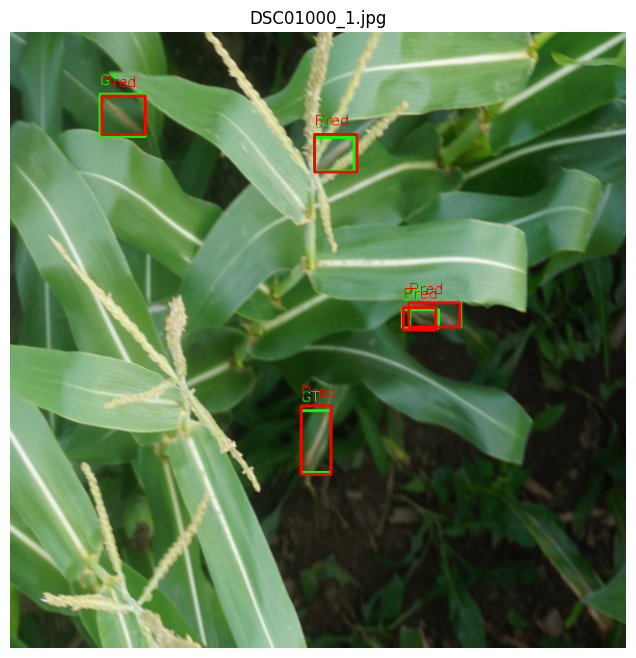


0: 640x640 8 lesions, 537.9ms
Speed: 2.7ms preprocess, 537.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
GT Box: [(113, 385, 174, 417), (136, 333, 307, 343), (213, 317, 323, 319), (220, 350, 257, 363), (193, 349, 228, 361), (201, 0, 222, 35), (181, 0, 197, 33), (393, 477, 418, 515), (357, 497, 418, 621), (421, 466, 431, 510), (412, 515, 423, 552), (420, 520, 440, 584)]
Pred Box: [[394.6024169921875, 484.01715087890625, 413.9476318359375, 518.8549194335938], [359.6896057128906, 491.4232177734375, 421.5832824707031, 619.95263671875], [183.15463256835938, 0.038715362548828125, 204.93136596679688, 30.47205352783203], [203.30897521972656, 0.0, 226.2107391357422, 33.16563415527344], [413.1873779296875, 517.650390625, 423.79290771484375, 553.43359375], [182.50424194335938, 0.0903778076171875, 214.22872924804688, 31.927845001220703], [287.39453125, 313.972900390625, 323.267578125, 322.3443603515625], [196.60252380371094, 351.3311767578125, 231.0990753173828, 360.3764648

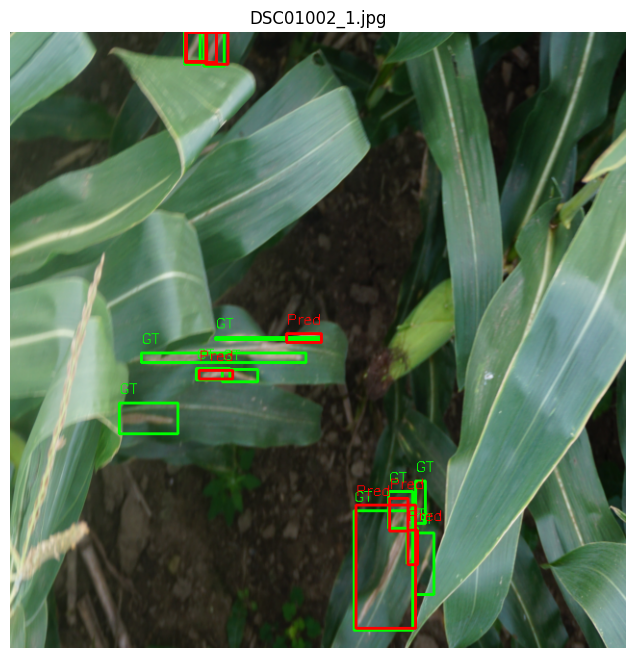


0: 640x640 3 lesions, 582.7ms
Speed: 3.3ms preprocess, 582.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
GT Box: [(211, 552, 251, 597), (504, 249, 539, 281), (573, 469, 580, 594)]
Pred Box: [[506.54071044921875, 246.82955932617188, 539.5245971679688, 280.3562316894531], [214.41934204101562, 557.411376953125, 248.84225463867188, 591.516845703125], [575.2421875, 476.1672668457031, 581.6949462890625, 583.033203125]]


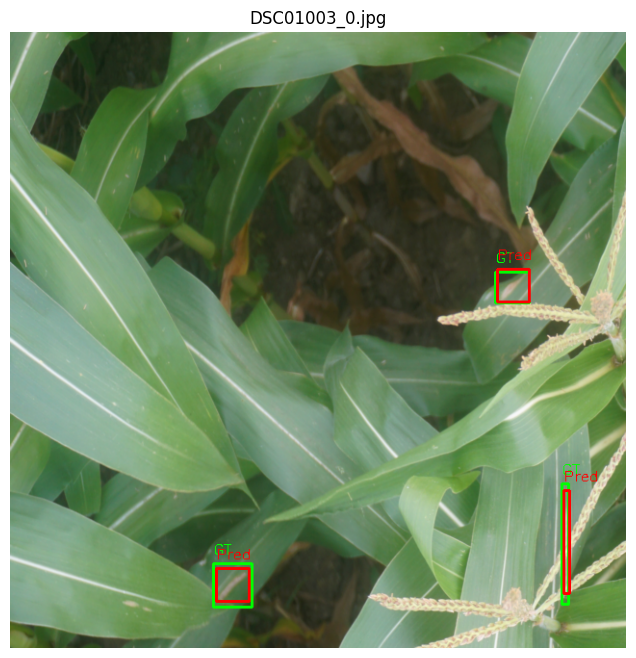


0: 640x640 10 lesions, 632.9ms
Speed: 3.0ms preprocess, 632.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
GT Box: [(556, 337, 564, 443), (308, 275, 350, 284), (304, 288, 344, 297), (513, 189, 548, 196), (482, 170, 527, 191), (514, 201, 559, 227), (393, 2, 419, 97), (534, 34, 550, 64)]
Pred Box: [[393.3734130859375, 0.0, 421.06536865234375, 94.15020751953125], [307.10369873046875, 286.88055419921875, 346.45843505859375, 299.41229248046875], [311.0101623535156, 272.6011962890625, 353.7079772949219, 284.041015625], [485.62078857421875, 168.85374450683594, 526.3951416015625, 191.4705047607422], [539.9820556640625, 522.6964111328125, 575.853515625, 536.6251220703125], [517.3831787109375, 202.1019287109375, 562.8094482421875, 222.71304321289062], [514.19921875, 185.81890869140625, 553.9853515625, 195.41021728515625], [533.9852294921875, 30.72314453125, 551.2667236328125, 65.12173461914062], [557.94775390625, 369.39276123046875, 566.115234375, 440.85198974609375], [517

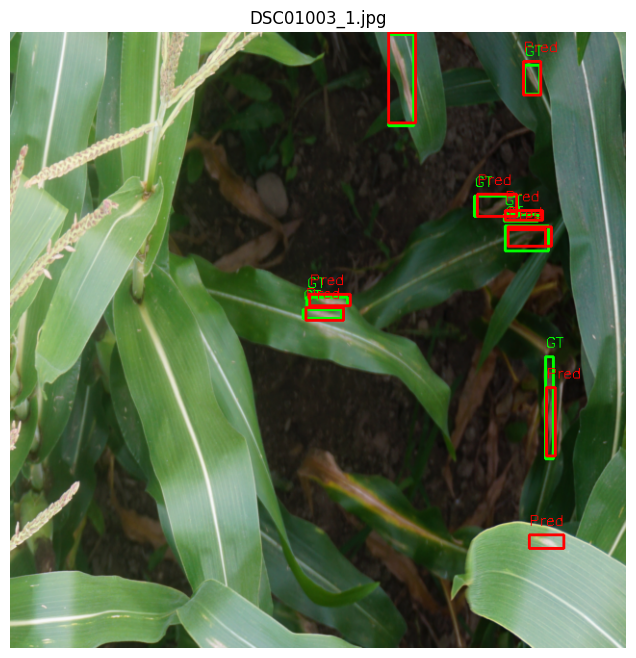


0: 640x640 (no detections), 558.2ms
Speed: 2.5ms preprocess, 558.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
GT Box: [(590, 371, 590, 408), (590, 400, 600, 425)]
Pred Box: []


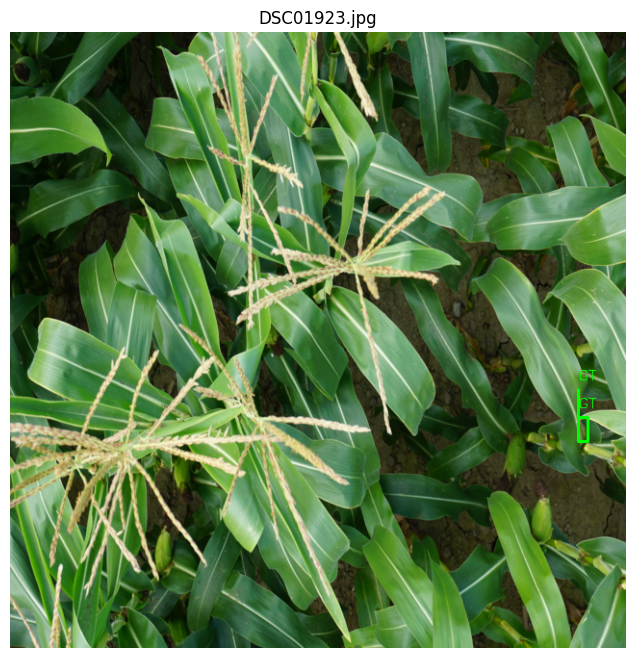


0: 640x640 4 lesions, 624.3ms
Speed: 3.0ms preprocess, 624.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
GT Box: [(41, 212, 87, 266), (81, 460, 129, 471), (292, 444, 302, 539)]
Pred Box: [[40.41480255126953, 212.583740234375, 90.07555389404297, 263.1064453125], [87.7296142578125, 459.11273193359375, 138.58868408203125, 471.25164794921875], [293.2485656738281, 438.46356201171875, 306.3883972167969, 528.2205200195312], [294.9227600097656, 440.37579345703125, 303.2910461425781, 540.157958984375]]


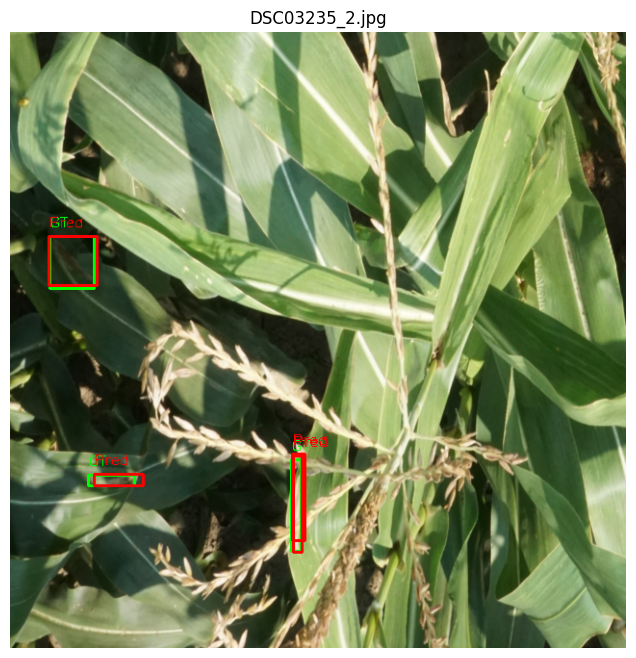


0: 640x640 2 lesions, 569.3ms
Speed: 3.2ms preprocess, 569.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
GT Box: [(208, 251, 286, 264)]
Pred Box: [[415.14923095703125, 224.03378295898438, 455.01959228515625, 252.36117553710938], [198.17666625976562, 251.1591796875, 278.3597106933594, 264.5299072265625]]


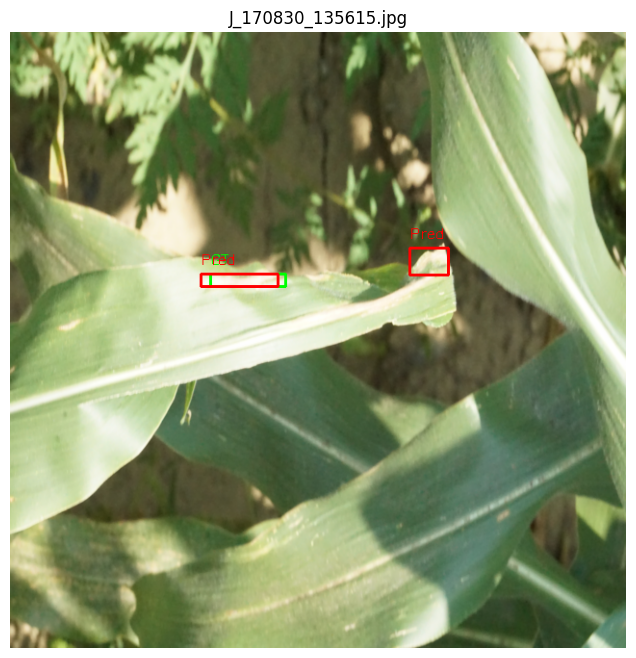


0: 640x640 1 lesion, 572.2ms
Speed: 2.4ms preprocess, 572.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
GT Box: [(178, 246, 218, 300)]
Pred Box: [[179.10284423828125, 246.83441162109375, 224.9915771484375, 311.5665283203125]]


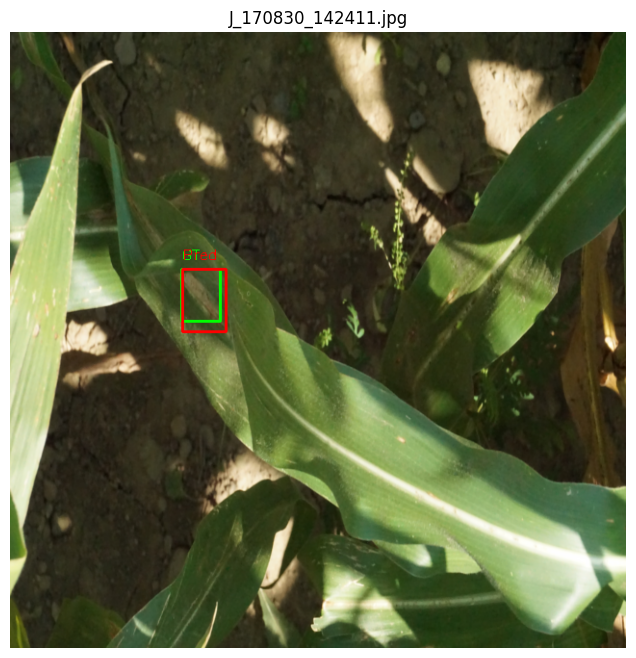


0: 640x640 1 lesion, 542.2ms
Speed: 2.9ms preprocess, 542.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
GT Box: [(269, 411, 418, 418), (373, 379, 444, 388), (443, 61, 468, 139), (568, 402, 571, 464), (623, 524, 633, 603), (325, 461, 369, 515)]
Pred Box: [[443.08673095703125, 65.45097351074219, 467.98046875, 142.70834350585938]]


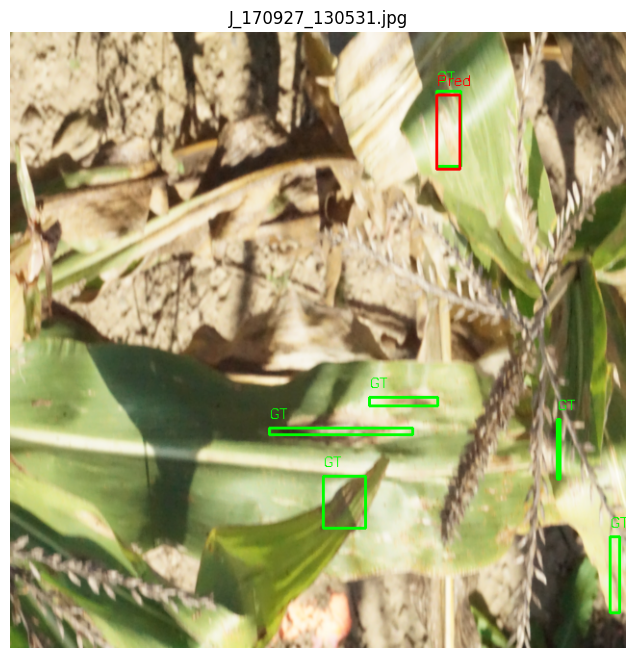


0: 640x640 2 lesions, 614.7ms
Speed: 2.9ms preprocess, 614.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
GT Box: [(0, 228, 100, 292), (32, 201, 110, 239)]
Pred Box: [[369.1446533203125, 60.06709289550781, 426.0791015625, 85.71626281738281], [0.104461669921875, 221.9727783203125, 101.81573486328125, 295.8974609375]]


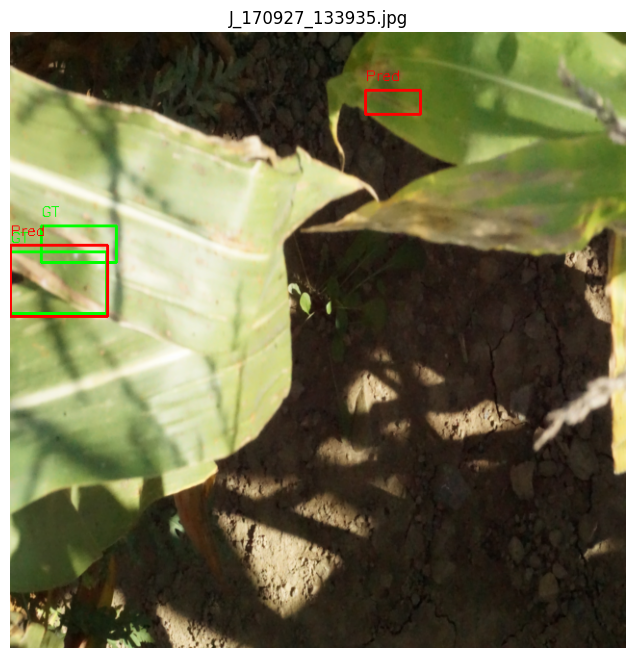

In [22]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_boxes(img, boxes, color, label):
    for b in boxes:
        x1, y1, x2, y2 = map(int, b)
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

target_size = 640

for img_file in list(test_img_dir.glob("*.jpg"))[:10]:
    img = Image.open(img_file).convert("RGB")
    w, h = img.size

    img_resized = img.resize((target_size, target_size), Image.BILINEAR)
    img_np = np.array(img_resized)

    true_boxes = gt_boxes.get(img_file.name, [])
    scale_x = target_size / w
    scale_y = target_size / h
    true_boxes_scaled = [
        (
            int(x1 * scale_x),
            int(y1 * scale_y),
            int(x2 * scale_x),
            int(y2 * scale_y)
        ) for (x1, y1, x2, y2) in true_boxes
    ]
    preds = model.predict(img_resized, imgsz=target_size, conf=0.25)[0]
    pred_boxes = preds.boxes.xyxy.cpu().numpy().tolist() if preds.boxes is not None else []

    img_vis = img_np.copy()
    plot_boxes(img_vis, true_boxes_scaled, (0, 255, 0), "GT")
    plot_boxes(img_vis, pred_boxes, (255, 0, 0), "Pred")

    print("GT Box:", true_boxes_scaled)
    print("Pred Box:", pred_boxes)

    plt.figure(figsize=(8, 8))
    plt.imshow(img_vis)
    plt.title(img_file.name)
    plt.axis('off')
    plt.show()
